In [18]:
from duckduckgo_search import ddg_images
from fastcore.all import *
#Importing required libraries

In [19]:
# Create a search images function
def search_images(term,max_images=30):
    print(f"Searching for '{term}'...")
    return L(ddg_images(term,max_results=max_images)).itemgot('image')

In [20]:
urls = search_images('car photos',max_images=1)
urls[0]


Searching for 'car photos'...


'https://wallpapercave.com/wp/I5Z5F6d.jpg'

In [9]:
#Download a demo image
from fastdownload import download_url
dest = 'car.jpg'
download_url(urls[0],dest,show_progress=False)


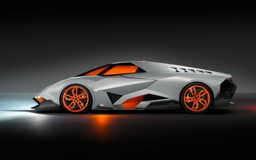

In [10]:
#View the image
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'car crash'...


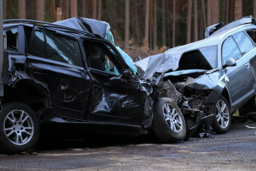

In [14]:
download_url(search_images('car crash', max_images=1)[0], 'crash.jpg',)
Image.open('crash.jpg').to_thumb(256,256)

In [21]:
path = Path('crash_or_not')

In [22]:
searches ='car','car crash'
path = Path('crash_or_not')
from time import sleep

for o in searches:
    dest = path/o
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest,urls=search_images(f'{o} photo'))
    sleep(10)
    download_images(dest,urls=search_images(f'{o} parked'))
    sleep(10)
    download_images(dest,urls=search_images(f'{o} traffic'))
    sleep(10)
    resize_image(path/o,max_size=400,dest=path/o)
    

Searching for 'car photo'...
Searching for 'car parked'...
Searching for 'car traffic'...
Searching for 'car crash photo'...
Searching for 'car crash parked'...
Searching for 'car crash traffic'...


In [23]:
#remove failed images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

8

In [24]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items =get_image_files,
    splitter= RandomSplitter(valid_pct=0.2,seed=42),
    get_y = parent_label,
    item_tfms= [Resize(192,method='squish')]

).dataloaders(path,bs=32)

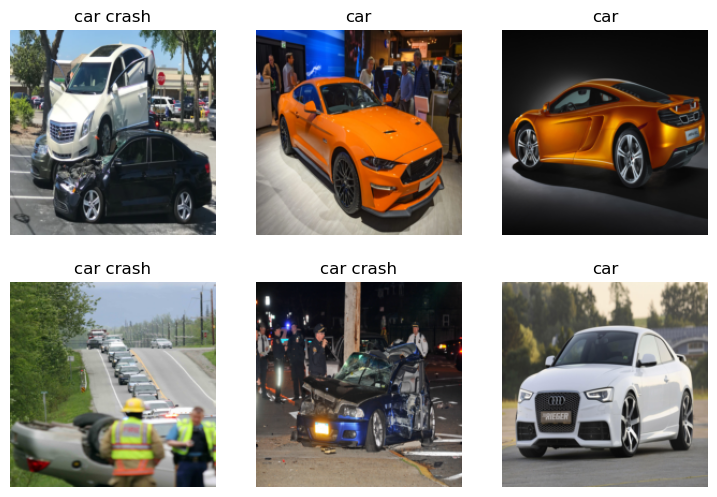

In [25]:
#Seeing the datablock
dls.show_batch(max_n=6)

ResNet-18 is a convolutional neural network that is 18 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database 

In [26]:
learn =  vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)    

epoch,train_loss,valid_loss,error_rate,time
0,1.497063,0.761473,0.400000,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.602585,0.703213,0.266667,00:13
1,0.390794,0.653442,0.233333,00:13
2,0.332860,0.551177,0.200000,00:18


In [28]:
is_car,_,probs = learn.predict(PILImage.create('crash.jpg'))
print(f"This is a : {is_car}")
print(f"Probability it's a car: {probs[0]:.4f}")

This is a : car crash
Probability it's a car: 0.0001


In [42]:
learn.export('model.pkl')